In [1]:
import pandas as pd

fichier_csv = "C:\\Users\\HP-PC\\Documents\\Private_data.csv"
df = pd.read_csv(fichier_csv)
print(df.head())

   Unnamed: 0 NAME OF THE STUDENT                UNIVERSITY PROGRAM NAME  \
0           0         Camila Wood  Stanford University, USA        B.Com   
1           1  Alexander Thompson  Stanford University, USA        B.Com   
2           2         Liam Taylor   Harvard University, USA        B.Com   
3           3      Evelyn Jenkins  Stanford University, USA        B.Com   
4           4     Michael Jackson   Harvard University, USA          MBA   

           Specialisation SEMESTER   Domain  \
0                 Honours      5th  Finance   
1      Financial Services      5th  Finance   
2    Accounting Analytics      5th       BA   
3                 Honours      5th  Finance   
4  International Business      3rd       IB   

   GENERAL MANAGEMENT SCORE (OUT of 50)  Domain Specific SCORE (OUT 50)  \
0                                    50                              50   
1                                    50                              50   
2                                  

In [2]:
print(df.describe()) 

       Unnamed: 0  GENERAL MANAGEMENT SCORE (OUT of 50)  \
count  151.000000                            151.000000   
mean    75.000000                             37.993377   
std     43.734045                             10.734056   
min      0.000000                              4.000000   
25%     37.500000                             32.500000   
50%     75.000000                             40.000000   
75%    112.500000                             47.000000   
max    150.000000                             50.000000   

       Domain Specific SCORE (OUT 50)  TOTAL SCORE (OUT of 100)        RANK  \
count                      151.000000                151.000000  151.000000   
mean                        33.635762                 71.629139   76.000000   
std                         11.866751                 21.200823   43.734045   
min                          1.000000                  5.000000    1.000000   
25%                         27.000000                 62.000000   38.5000

In [3]:
print(df.isna())

     Unnamed: 0  NAME OF THE STUDENT  UNIVERSITY  PROGRAM NAME  \
0         False                False       False         False   
1         False                False       False         False   
2         False                False       False         False   
3         False                False       False         False   
4         False                False       False         False   
..          ...                  ...         ...           ...   
146       False                False       False         False   
147       False                False       False         False   
148       False                False       False         False   
149       False                False       False         False   
150       False                False       False         False   

     Specialisation  SEMESTER  Domain  GENERAL MANAGEMENT SCORE (OUT of 50)  \
0             False     False   False                                 False   
1             False     False   False            

In [4]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
146    False
147    False
148    False
149    False
150    False
Length: 151, dtype: bool


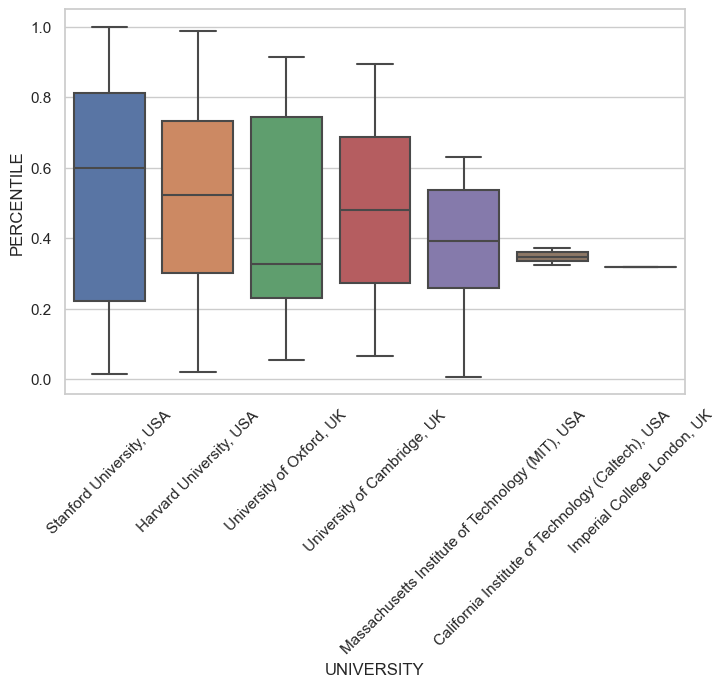

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créez un box plot pour chaque filière
sns.set(style = "whitegrid")
plt.figure(figsize= (8 , 5))
sns.boxplot(x = "UNIVERSITY", y = "PERCENTILE" , data = df)
plt.xticks(rotation = 45)  # Pour faire pivoter les étiquettes de filière si nécessaire
plt.show()

In [9]:
pip install --upgrade scipy


     -------------------------------------- 44.3/44.3 MB 734.2 kB/s eta 0:00:00
     -------------------------------------- 15.8/15.8 MB 461.1 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\HP-PC\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [10]:
from scipy.stats import f_oneway

In [12]:
program_name = df['PROGRAM NAME'].unique()

program_rank_dict = {program : df[df['PROGRAM NAME'] == program]['RANK'] for program in program_name}

# Effectuer l'ANOVA
f_statistic, p_value = f_oneway(*program_rank_dict.values())

In [13]:
f_statistic, p_value

(3.152401098338347, 0.026790899686321444)

In [14]:
#donc_on_deduit_qu'on a une variabilité significatif entre le PROGRAM NAME et le RANK
